# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

# Openweathermap API key
from api_keys import weather_api_key

## Generate Cities List

In [10]:
# Creating a list of cities
cities=[]

# Longitude, latitude combinations and then values within the given range is 
# equally likely drawn by uniform
lat = np.random.uniform(-90, 90, 1500)
lon = np.random.uniform(-180, 180, 1500)

# zip funtion is used to iterating in pair of latitudes and longitues.
lats_lons = zip(lat, lon)

# Finding nearest city for each latitue and longitude in pair
for lt_lo in lats_lons:
    city = citipy.nearest_city(lt_lo[0], lt_lo[1]).city_name
    
    # Finding unique city, then adding to cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Base url for the weather records
base_url="http://api.openweathermap.org/data/2.5/weather?"
units="Imperial"

# Query url for the weather records
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

# Lists is created
city_name=[]
lat=[]
lon=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country_name=[]
date=[]

print("Beginning Data Retrieval")
print("-------------------------------")

# City count and set count
city_count=1
set_count = 1

# for loop for each city response from json()
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country_name.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"Processing Record {city_count} of Set {set_count} | {city}")
        city_count=city_count + 1
    except:
        print("City not found. Skipping...")
        city_count = 1
        set_count = set_count + 1
        pass
    
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 3 | rikitea
Processing Record 2 of Set 3 | ushuaia
Processing Record 3 of Set 3 | puerto madryn
Processing Record 4 of Set 3 | castro
Processing Record 5 of Set 3 | punta arenas
Processing Record 6 of Set 3 | batemans bay
Processing Record 7 of Set 3 | vung tau
Processing Record 8 of Set 3 | cururupu
Processing Record 9 of Set 3 | taltal
Processing Record 10 of Set 3 | tuktoyaktuk
City not found. Skipping...
Processing Record 1 of Set 4 | sao joao da barra
Processing Record 2 of Set 4 | hilo
Processing Record 3 of Set 4 | nakonde
Processing Record 4 of Set 4 | hami
Processing Record 5 of Set 4 | clyde river
Processing Record 6 of Set 4 | cape town
Processing Record 7 of Set 4 | busselton
Processing Record 8 of Set 4 | guanica
Processing Record 9 of Set 4 | kapaa
Processing Record 10 of Set 4 | burlington
Processing Record 11 of Set 4 | xuddur
Proce

Processing Record 20 of Set 22 | flinders
Processing Record 21 of Set 22 | mangrol
Processing Record 22 of Set 22 | eldoret
Processing Record 23 of Set 22 | san bartolome de tirajana
Processing Record 24 of Set 22 | dikson
City not found. Skipping...
Processing Record 1 of Set 23 | izumo
Processing Record 2 of Set 23 | victoria
Processing Record 3 of Set 23 | ayan
Processing Record 4 of Set 23 | roald
Processing Record 5 of Set 23 | huaraz
Processing Record 6 of Set 23 | okhotsk
Processing Record 7 of Set 23 | skreia
Processing Record 8 of Set 23 | greystones
Processing Record 9 of Set 23 | mar del plata
Processing Record 10 of Set 23 | itupiranga
Processing Record 11 of Set 23 | macamic
Processing Record 12 of Set 23 | dawson
Processing Record 13 of Set 23 | brae
Processing Record 14 of Set 23 | acapulco
Processing Record 15 of Set 23 | faanui
Processing Record 16 of Set 23 | anadyr
Processing Record 17 of Set 23 | ridgecrest
Processing Record 18 of Set 23 | airai
Processing Record 19

Processing Record 13 of Set 40 | saldanha
Processing Record 14 of Set 40 | shiraz
City not found. Skipping...
Processing Record 1 of Set 41 | westport
Processing Record 2 of Set 41 | moramanga
City not found. Skipping...
Processing Record 1 of Set 42 | laem sing
Processing Record 2 of Set 42 | charlestown
Processing Record 3 of Set 42 | komsomolskiy
Processing Record 4 of Set 42 | lumeje
Processing Record 5 of Set 42 | bandar-e lengeh
Processing Record 6 of Set 42 | at-bashi
Processing Record 7 of Set 42 | neryungri
Processing Record 8 of Set 42 | saint-joseph
Processing Record 9 of Set 42 | mount isa
Processing Record 10 of Set 42 | ketchikan
Processing Record 11 of Set 42 | nishihara
Processing Record 12 of Set 42 | scarborough
Processing Record 13 of Set 42 | northam
Processing Record 14 of Set 42 | cochabamba
Processing Record 15 of Set 42 | tura
Processing Record 16 of Set 42 | pentecoste
Processing Record 17 of Set 42 | piacabucu
Processing Record 18 of Set 42 | honiara
Processin

Processing Record 8 of Set 56 | patacamaya
Processing Record 9 of Set 56 | nizhneivkino
Processing Record 10 of Set 56 | tehuacan
Processing Record 11 of Set 56 | the valley
---------------------------
Data Retrieval Complete
---------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Creating a dataframe
weather_report={"City":city_name, "Country":country_name, "Latitude":lat, "Longitude":lon, "Max Temperature":max_temp,"Humidity":humidity,
                         "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Date":date}
weather_df=pd.DataFrame(weather_report) 

# Finding the number of cities with weather report
print(f"Total number of cities with weather report {len(weather_df.index)}")
weather_df.head()

Total number of cities with weather report 561


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Rikitea,PF,-23.1203,-134.9692,73.56,78,1,15.41,1626146698
1,Ushuaia,AR,-54.8000,-68.3000,33.46,93,75,18.41,1626146443
2,Puerto Madryn,AR,-42.7692,-65.0385,48.25,46,2,8.52,1626146457
3,Castro,BR,-24.7911,-50.0119,51.42,72,4,4.29,1626146698
4,Punta Arenas,CL,-53.1500,-70.9167,35.71,80,20,18.41,1626146699


In [14]:
# Exporting csv file to Output folder
weather_df.to_csv(r'Output\city_weather.csv')

In [15]:
# Finding the aggregate values of all the numeric columns in the dataframe
agg_weather_summary=weather_df.agg('describe')
agg_weather_summary

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,20.015051,20.541798,70.414171,71.641711,56.705882,7.532210,1.626147e+09
std,32.572714,92.595973,13.555973,18.767134,38.559381,5.552287,8.199593e+01
min,-54.800000,-175.200000,33.460000,11.000000,0.000000,0.000000,1.626146e+09
25%,-6.884400,-66.895800,60.840000,63.000000,18.000000,3.420000,1.626147e+09
50%,22.816700,24.731400,72.050000,76.000000,68.000000,6.200000,1.626147e+09
75%,47.250000,106.270800,81.000000,85.000000,96.000000,10.180000,1.626147e+09
max,78.218600,179.316700,107.460000,100.000000,100.000000,34.520000,1.626147e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
humidity_gt_hundred=weather_df.loc[weather_df['Humidity'] > 100]

humidity_gt_hundred.Humidity.count()

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

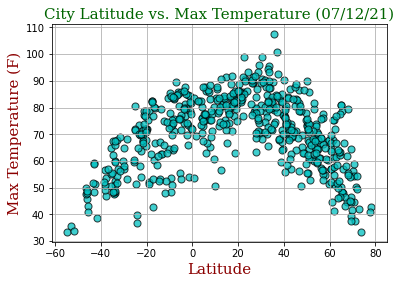

In [24]:
font1 = {'family':'serif','color':'darkgreen','size':15}
font2 = {'family':'serif','color':'darkred','size':15}

# Scatter plot Maximum Temperature Vs. Latitude
plt.scatter(weather_df.iloc[:,2], weather_df.iloc[:, 4], marker='o', 
            edgecolor='black', s=50, alpha=0.75, c ='c', label="Avg Tumor Volume")

# Style formatting title and labels
plt.title("City Latitude vs. Max Temperature (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Max Temperature (F)', fontdict=font2)
plt.grid()

## Latitude vs. Humidity Plot

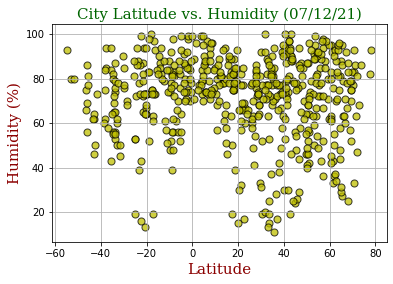

In [25]:
# Scatter plot Humidity (%) Vs. Latitude
plt.scatter(weather_df.iloc[:,2], weather_df.iloc[:, 5], marker='o', 
            edgecolor='black', s=50, alpha=0.75, c ='y', label="Avg Tumor Volume")

# Style formatting title and labels
plt.title("City Latitude vs. Humidity (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Humidity (%)', fontdict=font2)
plt.grid()

## Latitude vs. Cloudiness Plot

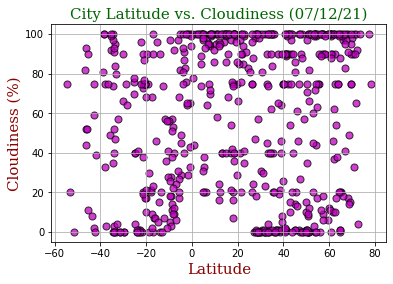

In [29]:
# Scatter plot Cloudiness (%) vs. Latitude
plt.scatter(weather_df.iloc[:,2], weather_df.iloc[:, 6], marker='o', 
            edgecolor='black', s=50, alpha=0.75, c ='m', label="Avg Tumor Volume")

# Style formatting title and labels
plt.title("City Latitude vs. Cloudiness (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Cloudiness (%)', fontdict=font2)
plt.grid()

## Latitude vs. Wind Speed Plot

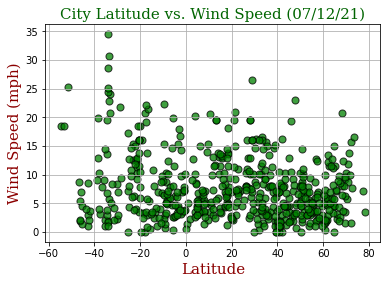

In [30]:
# Scatter plot Wind Speed (mph) Vs. Latitude
plt.scatter(weather_df.iloc[:,2], weather_df.iloc[:, 7], marker='o', 
            edgecolor='black', s=50, alpha=0.75, c ='g', label="Avg Tumor Volume")

# Style formatting title and labels
plt.title("City Latitude vs. Wind Speed (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Wind Speed (mph)',fontdict=font2)
plt.grid()

## Linear Regression

In [31]:
# Dependencies importing
import scipy.stats as sts
from scipy.stats import linregress

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

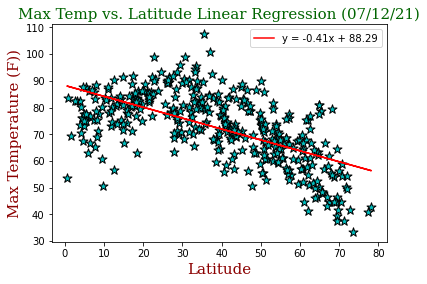

In [57]:
# Northern hemisphere latitude positive values
northern_weather=weather_df.loc[weather_df.Latitude > 0]

# Extracting column values of latitude and max temperature
lat_north=northern_weather['Latitude']
temp_north=northern_weather['Max Temperature']

fig, ax = plt.subplots()

# Finding slope, intercept, rvalue, pvalue and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north,temp_north)

# Calculating the regression value
regress_values = lat_north * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plotting
plt.scatter(lat_north,temp_north, c='c', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_north,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Max Temp vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Max Temperature (F))',fontdict=font2)

ax.legend(loc='best')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

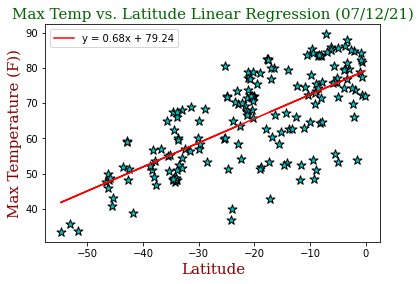

In [35]:
# Southern hemisphere latitude negative values
southern_weather=weather_df.loc[weather_df.Latitude < 0]

# Extracting column values of latitude and max temperature
lat_south=southern_weather['Latitude']
temp_south=southern_weather['Max Temperature']

fig, ax = plt.subplots()

# Finding slope, intercept, rvalue, pvalue and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,temp_south)

# Calculating the regression value
regress_values = lat_south * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south,temp_south, c='c', marker='*', s=90, edgecolor='black')

plt.plot(lat_south,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Max Temp vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Max Temperature (F))',fontdict=font2)

ax.legend(loc='best')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

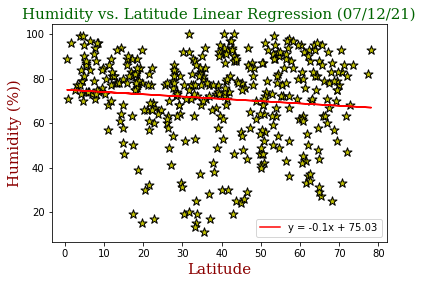

In [55]:
# Extracting column values of Humidity from the dataframe northern_weather
humi_north=northern_weather['Humidity']

fig, ax = plt.subplots()

# Finding slope, intercept, rvalue, pvalue and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north,humi_north)

# Calculating the regression value
regress_values = lat_north * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter ploting
plt.scatter(lat_north,humi_north, c='y', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_north,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Humidity vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Humidity (%))',fontdict=font2)

ax.legend(loc='best')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

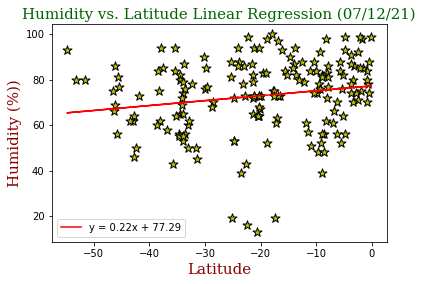

In [54]:
# Extracting column values of Humidity from the dataframe southern_weather
humi_south=southern_weather['Humidity']

fig, ax = plt.subplots()

# Finding slope, intercept, rvalue, pvalue and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,humi_south)

# Calculating the regression value
regress_values = lat_south * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plotting
plt.scatter(lat_south,humi_south, c='y', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_south,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Humidity vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Humidity (%))',fontdict=font2)

ax.legend(loc=3)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

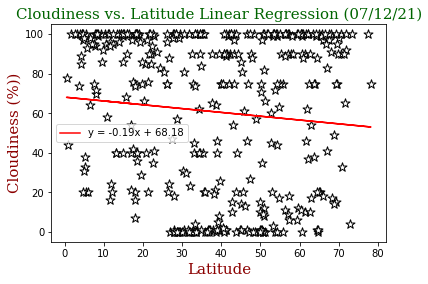

In [53]:
# Extracting column values of cloudiness from the dataframe northern_weather
cloud_north=northern_weather['Cloudiness']

fig, ax = plt.subplots()

# Finding values of slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north,cloud_north)

# Calculating the regression value
regress_values = lat_north * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plotting
plt.scatter(lat_north,cloud_north, c='1', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_north,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Cloudiness vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Cloudiness (%))',fontdict=font2)

ax.legend(loc=6)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

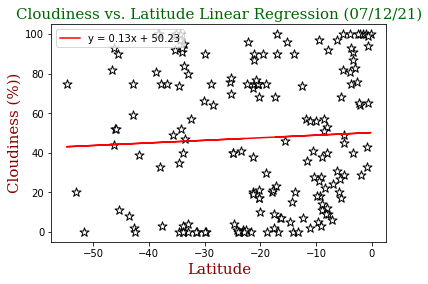

In [52]:
# Extracting column values of cloudiness from the dataframe southern_weather
cloud_south=southern_weather['Cloudiness']

fig, ax = plt.subplots()

# Finding values of slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,cloud_south)

# Calculating the regression value
regress_values = lat_south * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plotting
plt.scatter(lat_south,cloud_south, c='1', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_south,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Cloudiness vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Cloudiness (%))',fontdict=font2)

ax.legend(loc='best')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

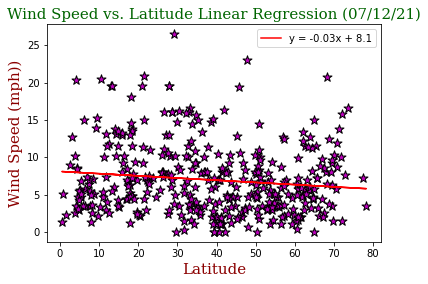

In [51]:
# Extracting column values of wind speed from the dataframe northern_weather
wind_north=northern_weather['Wind Speed']

fig, ax = plt.subplots()

# Finding values of slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north,wind_north)

# Calculating the regression value
regress_values = lat_north * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plotting
plt.scatter(lat_north,wind_north, c='m', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_north,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Wind Speed vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Wind Speed (mph))',fontdict=font2)

ax.legend(loc='best')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

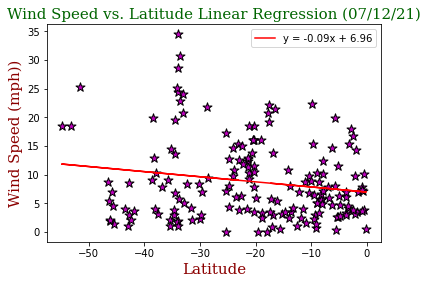

In [50]:
# Extracting column values of wind speed from the dataframe southern_weather 
wind_south=southern_weather['Wind Speed']

fig, ax = plt.subplots()

# Finding values of slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,wind_south)

# Calculating the regression value
regress_values = lat_south * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plotting
plt.scatter(lat_south,wind_south, c='m', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_south,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Wind Speed vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Wind Speed (mph))',fontdict=font2)

ax.legend(loc='best')